In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from datetime import datetime

In [3]:
#read sdg data for companies

In [4]:
SDG_zscore = pd.read_csv('whole_data_price.csv')
US_stock = pd.read_csv('UScompanies.csv')
US_stocks = list(US_stock.Ticker_new.unique())
SDG_zscore_US = SDG_zscore[SDG_zscore['Ticker'].isin(US_stocks)]

sector_list = list(SDG_zscore_US['Sector'].unique())
company_list = list(SDG_zscore_US['Ticker'].unique())

C:\Program1\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
SDG_zscore_US.head()

,Unnamed: 0,COMPANY,DATE,SDG_1,z_score_1,COUNT_1,MA_1,MA2_1,SDG_MOM_1,SDG_2,...,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,0,ABBOTT LABORATORIES,2015-02-19,-0.895522,-0.441850,1.0,NaN,NaN,NaN,-0.895522,...,46.0850,46.61,6590305.0,0.0,1.0,42.359521,42.642771,42.108251,42.587948,6590305.0
1,1,ABBOTT LABORATORIES,2015-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.4000,47.48,6512461.0,0.0,1.0,42.514852,43.465108,42.396069,43.382875,6512461.0
2,2,ABBOTT LABORATORIES,2015-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ABBOTT LABORATORIES,2015-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,ABBOTT LABORATORIES,2015-02-23,-3.045685,-1.502737,1.0,NaN,NaN,NaN,NaN,...,47.0235,47.32,5608147.0,0.0,1.0,43.245818,43.401149,42.965767,43.236681,5608147.0


In [6]:
SDG_zscore_US.drop(SDG_zscore_US[['Unnamed: 0', 'ISSUERID', 'ISSUER_CUSIP', 'ISSUER_SEDOL', 'ISSUER_ISIN', 
                                  'ISSUER_CNTRY_DOMICILE', 'IVA_PREVIOUS_RATING', 'IVA_RATING_TREND'
                                 , 'SDG_average', 'zscore_average', 'MA_average']], axis=1, inplace=True)

SDG_zscore_US = SDG_zscore_US.fillna(0)
Names=['SDG_'+str(i+1) for i in range(17)]
SDG_zscore_US["SDG_agg"] = SDG_zscore_US[Names].apply('mean',axis=1)
SDG_stm_US = SDG_zscore_US[['COMPANY', 'DATE', 'Ticker', 'SDG_agg', 'Sector', 'yr_n']]
SDG_stm_US.head()

C:\Program1\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,COMPANY,DATE,Ticker,SDG_agg,Sector,yr_n
0,ABBOTT LABORATORIES,2015-02-19,ABT,-0.705420,Health Care,2015.0
1,ABBOTT LABORATORIES,2015-02-20,ABT,-0.598721,Health Care,2015.0
2,ABBOTT LABORATORIES,2015-02-21,ABT,-1.019541,Health Care,2015.0
3,ABBOTT LABORATORIES,2015-02-22,ABT,0.111221,Health Care,2015.0
4,ABBOTT LABORATORIES,2015-02-23,ABT,-0.272006,Health Care,2015.0


In [7]:
#SDG_stm_US = c
SDG_stm_US.head()

,COMPANY,DATE,Ticker,SDG_agg,Sector,yr_n
0,ABBOTT LABORATORIES,2015-02-19,ABT,-0.705420,Health Care,2015.0
1,ABBOTT LABORATORIES,2015-02-20,ABT,-0.598721,Health Care,2015.0
2,ABBOTT LABORATORIES,2015-02-21,ABT,-1.019541,Health Care,2015.0
3,ABBOTT LABORATORIES,2015-02-22,ABT,0.111221,Health Care,2015.0
4,ABBOTT LABORATORIES,2015-02-23,ABT,-0.272006,Health Care,2015.0


In [8]:
SDG_stm_US['Date'] = pd.to_datetime(SDG_stm_US['DATE'])
SDG_stm_US = SDG_stm_US.drop(columns='DATE')
SDG_stm_US = SDG_stm_US.set_index('Date')

C:\Program1\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
SDG_stm_US.head()

,COMPANY,Ticker,SDG_agg,Sector,yr_n
Date,,,,,
2015-02-19,ABBOTT LABORATORIES,ABT,-0.705420,Health Care,2015.0
2015-02-20,ABBOTT LABORATORIES,ABT,-0.598721,Health Care,2015.0
2015-02-21,ABBOTT LABORATORIES,ABT,-1.019541,Health Care,2015.0
2015-02-22,ABBOTT LABORATORIES,ABT,0.111221,Health Care,2015.0
2015-02-23,ABBOTT LABORATORIES,ABT,-0.272006,Health Care,2015.0


In [10]:
sdg_monthly = SDG_stm_US.groupby(['Ticker','Sector']).resample('M').agg({'SDG_agg': 'mean'}).reset_index()

In [11]:
sdg_monthly['SDG_agg_change'] = sdg_monthly.groupby('Ticker')['SDG_agg'].transform(pd.Series.diff)

In [12]:
sdg_monthly = sdg_monthly.dropna()

In [13]:
date_list = list(sdg_monthly['Date'].unique()[:-1])
time = date_list[0]
#date_list.append(sdg_monthly['Date'])

In [14]:
len(date_list)

46

In [15]:
date_list = list(sdg_monthly['Date'].unique())
len(date_list)

47

In [16]:
stock2015 = pd.read_csv("stock_price_year_2015.csv")
stock2016 = pd.read_csv("stock_price_year_2016.csv")
stock2017 = pd.read_csv("stock_price_year_2017.csv")
stock2018 = pd.read_csv("stock_price_year_2018.csv")
prices = pd.concat([stock2015, stock2016, stock2017, stock2018])
prices = prices[prices['Ticker'].isin(company_list)]
prices = prices[['Date','Adj_Close','Ticker']]

prices['Date'] =pd.to_datetime(prices['Date'])
prices['Log_price'] = np.log(prices.Adj_Close)
prices['Log_ret'] = prices.groupby(['Ticker'])['Log_price'].transform(pd.Series.diff)

prices.index = prices['Date']
prices = prices.dropna()
prices = prices.drop(columns='Date')

prices = prices.reset_index()
prices.head()

,Date,Adj_Close,Ticker,Log_price,Log_ret
0,2015-01-05,60.411518,KLAC,4.101180,-0.022589
1,2015-01-06,58.626952,KLAC,4.071195,-0.029985
2,2015-01-07,59.602749,KLAC,4.087702,0.016507
3,2015-01-08,60.596128,KLAC,4.104231,0.016529
4,2015-01-09,60.807111,KLAC,4.107707,0.003476


In [17]:
prices['daily_return'] = prices.groupby('Ticker')['Adj_Close'].transform(pd.DataFrame.pct_change)
prices = prices.dropna()
prices['daily_return'] +=1
prices = prices.set_index('Date')

prices = prices.groupby(['Ticker']).resample('M').agg({'daily_return': np.product}).reset_index()
prices['daily_return']  -=1


In [18]:
prices.head(10)

,Ticker,Date,daily_return
0,A,2015-01-31,-0.051005
1,A,2015-02-28,0.117554
2,A,2015-03-31,-0.013242
3,A,2015-04-30,-0.004332
4,A,2015-05-31,-0.004351
5,A,2015-06-30,-0.061024
6,A,2015-07-31,0.061431
7,A,2015-08-31,-0.113309
8,A,2015-09-30,-0.051786
9,A,2015-10-31,0.099913


In [19]:
sp_data=pdr.get_data_yahoo('^GSPC','2015-01-01','2018-12-31')
sp_data['Log_price'] = np.log(sp_data['Adj Close'])
sp_data['Log_ret_sp'] = sp_data['Log_price'].transform(pd.Series.diff)

sp_data = sp_data.reset_index().dropna()
sp_data = sp_data[['Log_ret_sp','Date']]
sp_data.head()

,Log_ret_sp,Date
1,-0.018447,2015-01-05
2,-0.008933,2015-01-06
3,0.011563,2015-01-07
4,0.017730,2015-01-08
5,-0.008439,2015-01-09


In [20]:
date_list = list(sdg_monthly['Date'].unique())

In [21]:
date_list[45]

numpy.datetime64('2018-12-31T00:00:00.000000000')

In [34]:
sector_list.index(sector_list[0])

0

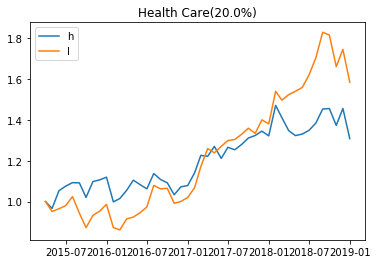

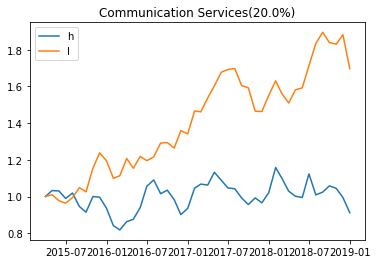

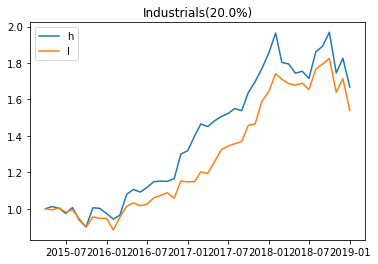

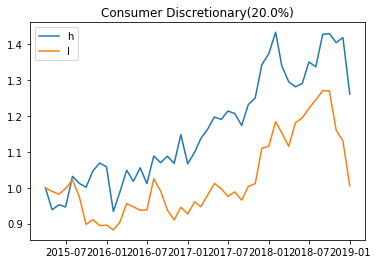

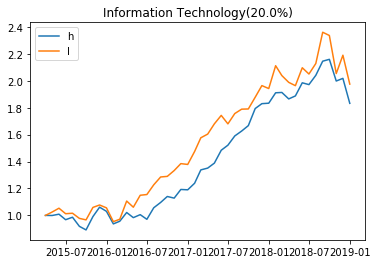

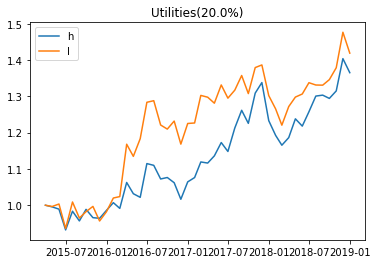

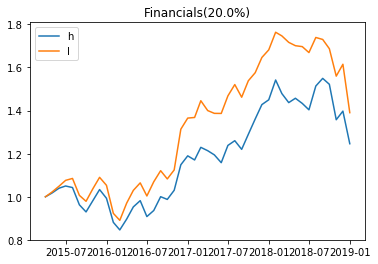

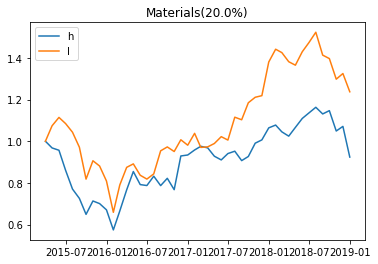

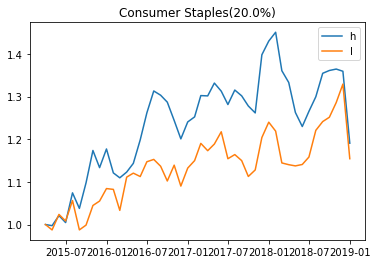

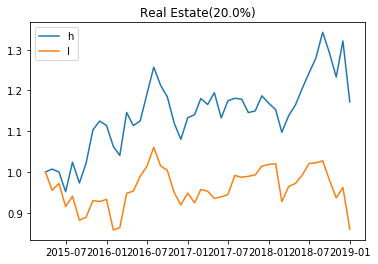

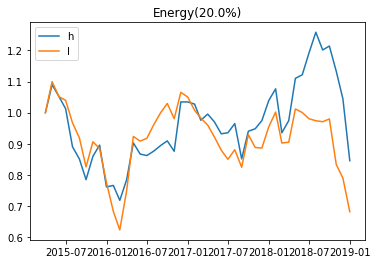

In [69]:
# compute sdg_zscore_change 
num_stocks_in_high = {}
num_stocks_in_low = {}
high_return_dict = {}
low_return_dict = {}
spread_dict = {}
check_significance ={}

percent = 0.2


for sector in sector_list:
    num_stocks_in_high[sector] = []
    num_stocks_in_low[sector] = []
    
    high_return = [0]
    low_return = [0]
    time_frame = [date_list[0]]
    
    check_significance[sector] = []
    
    spread_list = []
    
    for time in date_list[:-1]:

        group_1 = sdg_monthly[sdg_monthly['Sector']==sector]

        num = group_1[group_1['Date']==time].sort_values(by = 'SDG_agg_change',ascending=False).shape[0]
        high_low_size = round(num*percent)

        
        index = date_list.index(time) + 1
        #high_group is the list that includes all the companies with high sdg scores
        high_group = list(group_1[group_1['Date']==time].sort_values(by = 'SDG_agg_change',ascending=False)['Ticker'].iloc[0:high_low_size].values)
        low_group = list(group_1[group_1['Date']==time].sort_values(by = 'SDG_agg_change',ascending=False)['Ticker'].iloc[-high_low_size:].values)
        
        #high_monthly is the dataframe that includes high sdg change stocks with monthly return 
        high_monthly = prices.loc[prices['Ticker'].isin(high_group)]
        low_monthly = prices.loc[prices['Ticker'].isin(low_group)]

        high_monthly = high_monthly.loc[high_monthly['Date'].isin(date_list)]
        low_monthly = low_monthly.loc[low_monthly['Date'].isin(date_list)]

        if index < len(date_list[:-1]):
            return_h = high_monthly[high_monthly['Date']==date_list[index]]['daily_return'].mean()
            return_l = low_monthly[low_monthly['Date']==date_list[index]]['daily_return'].mean()

            time_frame.append(date_list[index])
            high_return.append(return_h)
            low_return.append(return_l)
            
            spread_list.append(return_h-return_l)
            check_significance[sector].append(return_h-return_l)
            
            
            num_stocks_in_high[sector].append(high_low_size)
            num_stocks_in_low[sector].append(high_low_size)
    
    high_return_dict[sector] = np.mean(high_return)
    low_return_dict[sector] = np.mean(low_return)
    
    spread_dict[sector] = np.mean(spread_list)
    
    high_return = np.array(high_return) +1
    low_return = np.array(low_return) +1
    high_return = np.cumprod(high_return)
    low_return = np.cumprod(low_return)
    
    #plt.subplot(4,3,sector_list.index(sector)+1)
    plt.plot(time_frame,high_return)
    plt.plot(time_frame,low_return)
    plt.legend('hl')
    plt.title(sector+'('+str(percent*100)+'%'+')')
    fig1 = plt.gcf()
    fig1.savefig(sector+'.png', dpi=100)
    plt.show()

#group_1.sort_values( ['DATE','z_score_change'],ascending= ['True','True'])

In [47]:
len(high_return)

46

In [44]:
date_list[45]

numpy.datetime64('2018-12-31T00:00:00.000000000')

In [45]:
date_list[1]

numpy.datetime64('2015-04-30T00:00:00.000000000')

### check significance

In [57]:
confidence_interval = {}

for i in sector_list:
    confidence_interval[i] = []
    
    mean_value = np.mean(check_significance[i])
    num = 1/(len(check_significance[i]))
    variance = np.var(check_significance[i])
    higher_bound = mean_value+1.96*np.power(variance*num,0.5)
    lower_bound = (mean_value)-1.96*np.power(variance*num,0.5)
    
    confidence_interval[i].append(lower_bound)
    confidence_interval[i].append(higher_bound)


In [58]:
confidence_interval

{'Health Care': [-0.014136719094098082, 0.005091600307493321],
 'Communication Services': [-0.03159538268970054, 0.005084812649542993],
 'Industrials': [-0.0056310252866458264, 0.009742831550908753],
 'Consumer Discretionary': [-0.0056158430141913475, 0.01617767946456069],
 'Information Technology': [-0.010991086165125091, 0.006873424833137349],
 'Utilities': [-0.007538437271884401, 0.005399658249945809],
 'Financials': [-0.008090380034457724, 0.0030019896019435337],
 'Materials': [-0.02354579959180828, 0.010570325284331609],
 'Consumer Staples': [-0.007661117050504313, 0.009221567656840504],
 'Real Estate': [-0.000591637449850909, 0.014659244520466803],
 'Energy': [-0.008719645100877825, 0.01797484998950676]}

In [59]:
df_box = pd.DataFrame()
flag = 0
for i in confidence_interval.keys():
    
    df_box[i] = list(check_significance[i])
    
    flag +=1
df_box.head()

,Health Care,Communication Services,Industrials,Consumer Discretionary,Information Technology,Utilities,Financials,Materials,Consumer Staples,Real Estate,Energy
0,0.015026,0.022529,0.018126,-0.051221,-0.025563,-0.000916,-0.004623,-0.106402,0.009948,0.051792,-0.009720
1,0.075449,0.030880,-0.019783,0.022796,-0.018210,-0.013235,-0.004327,-0.048735,-0.013146,-0.024282,0.009037
2,0.005788,-0.026279,-0.005465,-0.022659,-0.001878,0.009184,-0.016130,-0.074290,-0.000888,0.010181,-0.026159
3,-0.029413,-0.001921,0.019317,0.066297,0.015622,-0.022581,-0.015126,-0.066114,0.021845,0.047831,-0.051139
4,0.078033,-0.126316,-0.017839,0.027702,-0.030944,0.016681,-0.004451,0.010843,0.031150,0.012947,0.005733


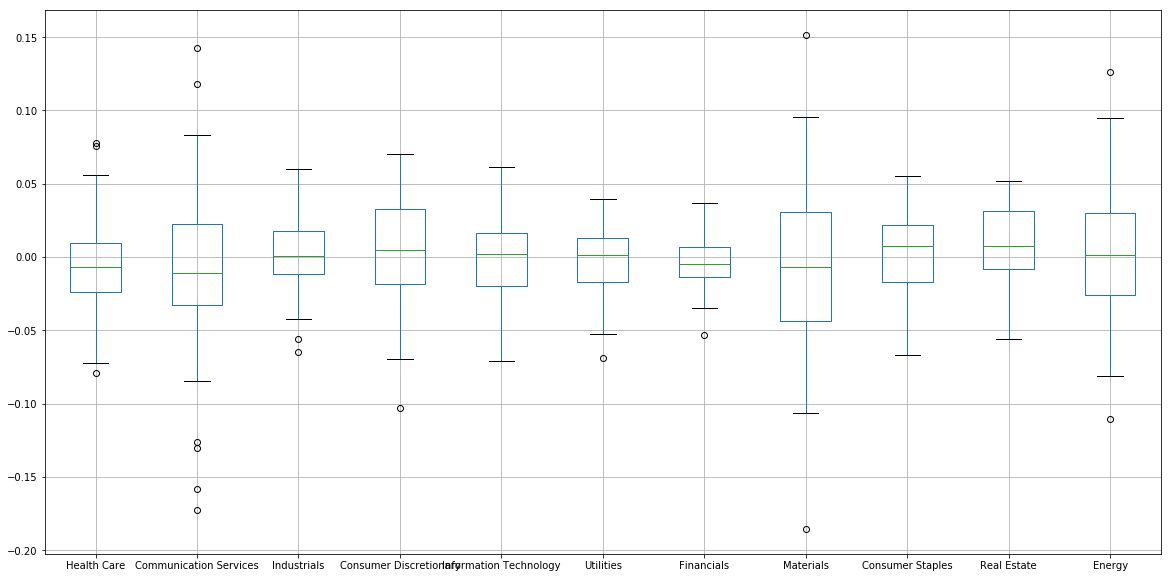

In [60]:
# spread data. high_return - low_return over times (<50 datapoint)in a given industry
boxplot = df_box.boxplot(figsize=(20,10))

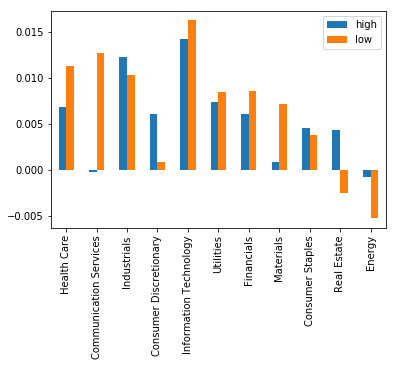

In [70]:
#high_return low_return (monthly data) over time for a given industry

df = pd.DataFrame()
df.set_index = sector_list

df['high'] = high_return_dict.values()
df['low'] = low_return_dict.values()

df.index = sector_list

df.plot(kind='bar')

In [67]:
num_stocks_in_high

{'Health Care': [5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5],
 'Communication Services': [2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2],
 'Industrials': [5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5],
 'Consumer Discretionary': [5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5],
 'Information 

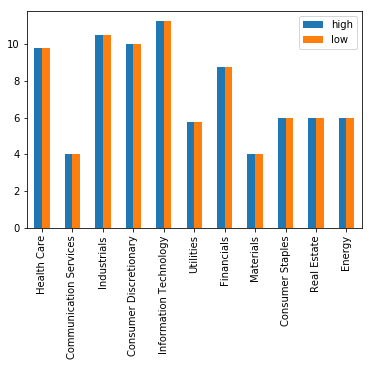

In [71]:

num_stocks = {}

for i in sector_list:
    mean = np.mean(num_stocks_in_high[i])
    num_stocks[i] = mean



df_num = pd.DataFrame()
df_num.set_index = sector_list

df_num['high'] = num_stocks.values()
df_num['low'] = num_stocks.values()

df_num.index = sector_list

df_num.plot(kind='bar')

In [ ]:
num_stocks = {}

for i in sector_list:
    mean = np.mean(num_stocks_in_high[i])
    num_stocks[i] = mean



In [28]:
high_return_dict

{'Health Care': 0.005596714401772975,
 'Communication Services': 0.00040989386379463027,
 'Industrials': 0.012975473329155742,
 'Consumer Discretionary': 0.009979015185148188,
 'Information Technology': 0.010808478699010991,
 'Utilities': 0.005663271685585773,
 'Financials': 0.003759364124920515,
 'Materials': -0.00020114727676958004,
 'Consumer Staples': 0.001705199078446852,
 'Real Estate': 0.006236240302060263,
 'Energy': 0.00023383267199879744}

In [29]:
low_return_dict

{'Health Care': 0.011944621644029206,
 'Communication Services': 0.016139660503753487,
 'Industrials': 0.010844248700556785,
 'Consumer Discretionary': 0.005046902062648542,
 'Information Technology': 0.014753861438637921,
 'Utilities': 0.008117728719229418,
 'Financials': 0.008398849398697238,
 'Materials': 0.011053120097159702,
 'Consumer Staples': 0.006514605398068089,
 'Real Estate': -0.00022753495793765698,
 'Energy': -0.006563022130252355}

In [32]:
num_stocks_in_high

{'Health Care': 8,
 'Communication Services': 3,
 'Industrials': 8,
 'Consumer Discretionary': 8,
 'Information Technology': 9,
 'Utilities': 4,
 'Financials': 6,
 'Materials': 3,
 'Consumer Staples': 4,
 'Real Estate': 4,
 'Energy': 4}

In [33]:
num_stocks_in_low

{'Health Care': 8,
 'Communication Services': 3,
 'Industrials': 8,
 'Consumer Discretionary': 8,
 'Information Technology': 9,
 'Utilities': 4,
 'Financials': 6,
 'Materials': 3,
 'Consumer Staples': 4,
 'Real Estate': 4,
 'Energy': 4}